In [ ]:
!pip install plotly
!pip install cufflinks
!pip install chart_studio


In [7]:
#1. What is the total revenue generated in the dataset?
sales["Revenue"].sum()



29521000

In [8]:
#2. How many total transactions were recorded?
sales['TransactionID'].nunique()

110

In [ ]:
#3. How many distinct customers made purchases?
sales['CustomerID'].nunique()

In [12]:
#4. What is the total revenue generated from Lagos alone?
sales[sales['City'] =='Lagos']['Revenue'].sum()

9285500

In [13]:
#5. How many units of "Accessories" were sold in Abuja?
sales[(sales['City'] =='Abuja') & (sales['Category'] == 'Accessories')]['UnitsSold'].sum()

22

In [ ]:
#6. What is the average discount offered across all transactions?
sales['Discount'].mean()

In [ ]:
#7. What was the revenue for February 2024?
sales["Date"] = sales["Date"].astype("datetime64[ns]")

In [ ]:
sales["Month"] = sales["Date"].dt.to_period("M")

In [ ]:
sales["Month"]

In [ ]:
sales.groupby(["Month"])["Revenue"].sum().loc["2024-02"]

In [ ]:
#8. Which month had the highest sales revenue?
sales.groupby(["Month"])["Revenue"].sum().nlargest()


In [ ]:
#9. Create a measure to calculate monthly revenue trend
import matplotlib.pyplot as plt
sale = sales.groupby(sales["Date"].dt.to_period("M"))["Revenue"].sum().reset_index()
sale

In [ ]:
#10. What is the average revenue per customer?
sales.groupby(['CustomerID'])['Revenue'].mean()

In [ ]:
#11. How many customers bought more than once?
repeat_customer = sales['CustomerID'].value_counts()
repeat_customer[repeat_customer>1].count()

In [ ]:
#12. Which product category generated the most revenue?
sales.groupby(['Category'])['Revenue'].sum().sort_values(ascending=False)

In [ ]:
#13. What is the average revenue per unit for Electronics?
sales = sales[sales['Category'] == 'Electronic']

In [ ]:
#14. Which sales rep generated the highest total revenue?
sales.groupby(['SalesRep'])['Revenue'].sum().sort_values(ascending=False)

In [ ]:
#15. Calculate total units sold by each sales rep.
sales.groupby(['SalesRep'])['UnitsSold'].sum()

In [ ]:
#16. Calculates revenue from Lagos only if the customer is "New". (New customers only)
sales[(sales["City"] == 'Lagos') & (sales['CustomerType'] == "New")]['Revenue'].sum()


In [ ]:
#17. Calculate the total revenue excluding transactions from Port Harcourt.
sales[sales['City'] != 'Port Harcourt']['Revenue'].sum()

In [ ]:
#18. Create a measure to calculate average units sold per transaction.
sales['UnitsSold'].mean()

In [ ]:
#19. Calculate the total discount value across all sales.
sales[(sales['Category']=='Electronics')&(sales['CustomerType']=='Returning')]['Revenue'].sum()

In [15]:
sales ["Dates"] = sales ["Date"].astype("datetime64[ns]")


In [16]:
sales ["Month"] = sales ["Dates"].dt.month_name()


In [ ]:
plt.figure(figsize=[14,8])
sns.lineplot (x="Month", y="Revenue",data=sales)
plt.title ("MONTHLY TREND" )
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

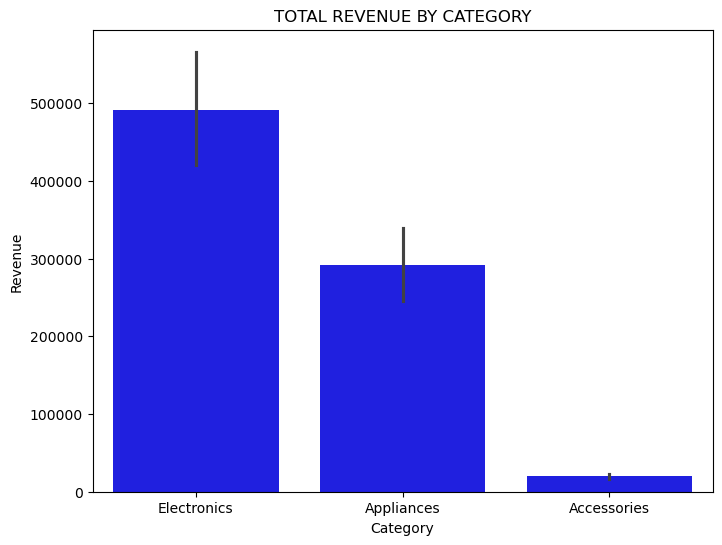

In [9]:
plt. figure(figsize=[8,6])
sns.barplot(x="Category",y="Revenue",data =sales, color="b")
plt.title("TOTAL REVENUE BY CATEGORY")
plt. show


In [ ]:
plt.figure(figsize=[8,6])
sns.barplot (x="City",y="Revenue",data =sales, color="b" )
plt.title("TOTAL REVENUE BY CITY")
plt. show


In [ ]:
sales.groupby(['SalesRep'])['UnitsSold'].sum().reset_index()

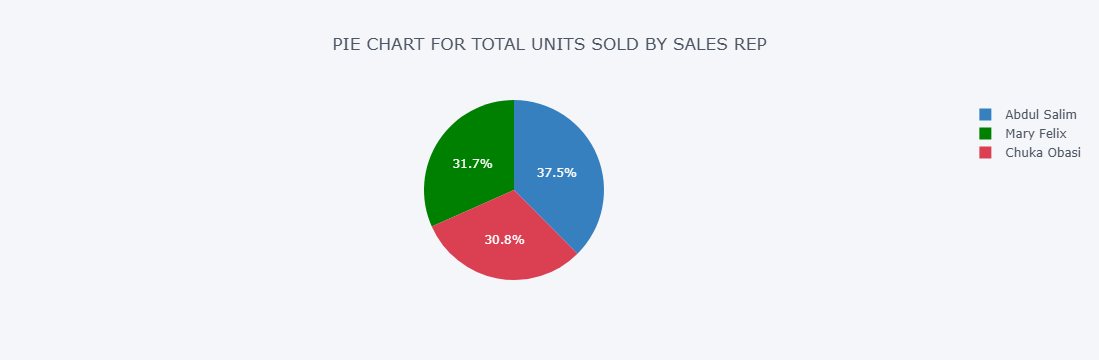

In [10]:
sales.iplot(kind="pie", labels="SalesRep", values= "UnitsSold", colors = ["red", "green", "blue"],
title="PIE CHART FOR TOTAL UNITS SOLD BY SALES REP")

In [ ]:
plt.figure(figsize=[30,15])
plt.subplot (2,2,1)
sns.barplot (x="Category",y="Revenue", data =sales, color="b")
plt.title("TOTAL REVENUE BY CATEGORY")

plt.subplot(2,2,2)
sns.lineplot (x="Month" , y="Revenue",data =sales)
plt. title("MONTHLY TREND")

plt. subplot (2,2,3)
sns.barplot(x="City" ,y="Revenue", data =sales, color="b")
plt.title("TOTAL REVENUE BY CITY")
